<a href="https://colab.research.google.com/github/athan37/AIT-Deeplearning/blob/main/Copy_of_AIT_09_Author_classification_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Copyright

<PRE>
Copyright (c) 2023 Bálint Gyires-Tóth - All Rights Reserved
You may use and modify this code for research and development purpuses.
Use this code for educational purposes (self-paced or instructor led) without the permission of the author is prohibited.
</PRE>

# Author classification
The task is to train a 1D CNN or an LSTM that is able to  classify text from two authors. The final model should be able to tell about a text with a given length (e.g. 60 characters) who wrote it. 

Please write the codes according to the following parts:

## Python module imports
Import all Python modules that you would need during the Assignment.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import RMSprop
from urllib.request import urlretrieve
import numpy as np
import random
import sys
import re, cgi

## Data acquisition
Seek a possible dataset, you can use any source, e.g.
* http://www.gutenberg.org/
* https://www.kaggle.com/datasets
* https://paperswithcode.com/datasets
* if you would like to learn Hungarian, than e.g. https://mek.oszk.hu/

You can download the text by hand (e.g. by copy-pasting some parts into txt files) or with Python. 

In [2]:
book1_url="https://www.gutenberg.org/cache/epub/70579/pg70579.txt" #Elbert Hubbard
urlretrieve(book1_url, 'book1.txt')

path1 = "book1.txt"
text1 = ""
with open(path1, 'rb') as f:
  text1 = f.read().lower().decode("utf-8")

book2_url="http://www.gutenberg.org/files/2151/2151-0.txt" #someone else
urlretrieve(book2_url, 'book2.txt')
text2 = open("book2.txt", encoding='utf-8').read().lower()

print('Number of characters in the text 1:', len(text1))

print('Number of characters in the text 2:', len(text2))

Number of characters in the text 1: 170013
Number of characters in the text 2: 486583


## Data analysis
Count the number of characters from both authors and display them on a plot (e.g. Seaborn's countplot).

In [3]:
from collections import Counter 


counter1 = Counter(text1)
counter2 = Counter(text2)  

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Text(0.5, 1.0, 'Author 1 characters')

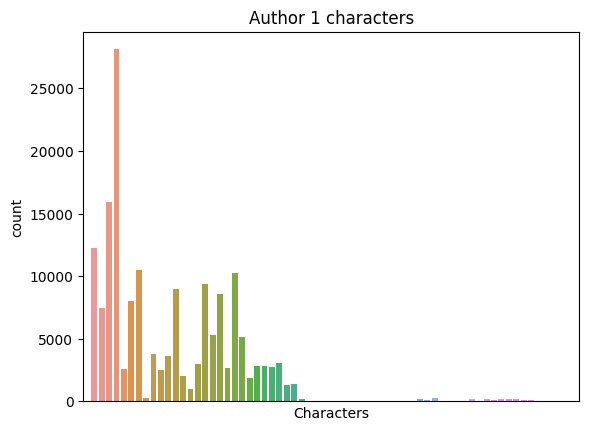

In [5]:
ax = sns.countplot(x=list(counter1.elements()))

# remove xticks and xlabels
ax.set(xticks=[], xlabel="Characters")
plt.title("Author 1 characters")

Text(0.5, 1.0, 'Author 2 characters')

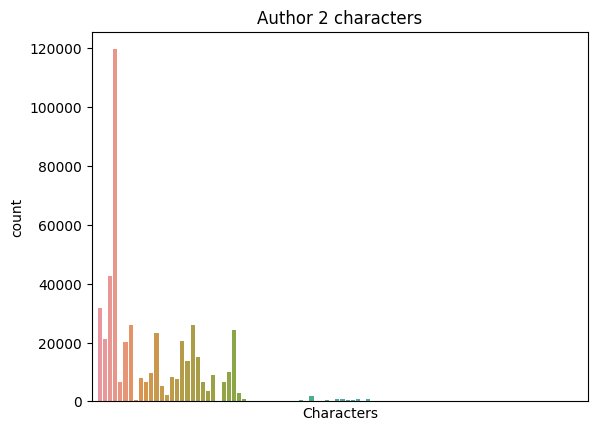

In [6]:

ax2 = sns.countplot(x=list(counter2.elements()))

# remove xticks and xlabels
ax2.set(xticks=[], xlabel="Characters")
plt.title("Author 2 characters")

## Data loading, labeling and preprocessing
Load the data and convert the characters into one-hot encodings. Then load the data into a 3D NumPy array, with a shape of

* (batch, sequence_length, alphabet_length)

where sequence_length=60, and alphabet_length equals to the number of unique characters in both datasets. The sequences should be cut out from the complete dataset by sliding window. You should add 0 and 1 labels to the sequences, according to the author. 

Later you may change sequence_length to achieve better results!

In [7]:
chars1 = sorted(list(set(text1)))
print('Unique characters of the book 1:', len(chars1))

chars2 = sorted(list(set(text2)))
print('Unique characters of the book 2:', len(chars2))

Unique characters of the book 1: 67
Unique characters of the book 2: 96


In [8]:
#Expand the corpus and one hot
chars = set(chars1) | set(chars2)

In [9]:
from sklearn.model_selection import train_test_split
def preprocess(text, author, maxlen=64, step=10, chars = chars):
  char_indices = dict((c, i) for i, c in enumerate(chars))
  indices_char = dict((i, c) for i, c in enumerate(chars))

  print ("Indices to char dictionary:", indices_char)

  sentences  = [] # maxlen number of characters, with "step" overlap between two "sentences" 
  next_chars = [] # the next character

  for i in range(0, len(text)-maxlen, step):
      sentences.append(text[i:i+maxlen])
      next_chars.append(text[i+maxlen])

  print('Number of training samples:', len(sentences))

  X = np.zeros((len(sentences), maxlen, len(chars)))
  y = np.zeros(len(sentences)) if author == 0 else np.ones(len(sentences))

  for i, sentence in enumerate(sentences):
      for t, char in enumerate(sentence): 
          X[i,t,char_indices[char]] = 1

  print("Shape of the input data:", X.shape)
  print("Shape of the target data:", y.shape)

  return train_test_split(X, y, test_size=0.2, random_state=42)

## Data splitting
Split the data into train, validate and test sets. Make 

In [10]:
X_train1, X_test1, y_train1, y_test1 = preprocess(text1, 0)
X_train2, X_test2, y_train2, y_test2 = preprocess(text2, 1)

X_train = np.concatenate((X_train1, X_train2))
X_test = np.concatenate((X_test1, X_test2))
y_train = np.concatenate((y_train1, y_train2))
y_test = np.concatenate((y_test1, y_test2))

#Reshuffle
num_train_samples = X_train.shape[0]

train_indices = np.random.permutation(num_train_samples)

X_train = X_train[train_indices]
y_train = y_train[train_indices]

train_ratio  = 0.8
train_length = X_train.shape[0]
train_split  = int(train_ratio*train_length)
X_valid, y_valid = X_train[train_split:], y_train[train_split:]
X_train, y_train = X_train[:train_split], y_train[:train_split]

Indices to char dictionary: {0: ';', 1: 'x', 2: '—', 3: 'ν', 4: 'ξ', 5: 'k', 6: ':', 7: '“', 8: '•', 9: 'π', 10: 'o', 11: 'f', 12: 'é', 13: 'ι', 14: '#', 15: '/', 16: 's', 17: 'h', 18: '(', 19: 'ê', 20: '%', 21: 'd', 22: 'u', 23: 'n', 24: 'ü', 25: 'z', 26: '$', 27: 'g', 28: 'j', 29: 'r', 30: '❦', 31: '3', 32: 'ú', 33: ']', 34: 'è', 35: 'ρ', 36: 'œ', 37: '*', 38: 't', 39: '0', 40: 'ö', 41: 'ῆ', 42: '6', 43: 'e', 44: 'λ', 45: 'ῦ', 46: "'", 47: 'i', 48: '?', 49: 'a', 50: 'w', 51: '&', 52: '=', 53: 'α', 54: 'v', 55: '8', 56: ' ', 57: 'τ', 58: '‘', 59: 'æ', 60: '™', 61: 'b', 62: '’', 63: 'c', 64: 'à', 65: 'ς', 66: '-', 67: '\n', 68: '4', 69: '.', 70: '\r', 71: '2', 72: '”', 73: 'â', 74: 'y', 75: '9', 76: 'σ', 77: '1', 78: '!', 79: 'η', 80: '_', 81: 'ε', 82: 'q', 83: ',', 84: 'χ', 85: '[', 86: 'l', 87: '¶', 88: '7', 89: 'ο', 90: 'υ', 91: 'γ', 92: '}', 93: '5', 94: 'p', 95: '\ufeff', 96: '{', 97: 'δ', 98: 'm', 99: ')'}
Number of training samples: 16995
Shape of the input data: (16995, 64, 100

## Model definition
Define a 1D CNN or an LSTM for the task. Compile the model with the correct loss function.

In [11]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[-2], X_train.shape[-1]))) # (batch, 128)
model.add(Dense(1, activation ='sigmoid'))

## Model training
Train the model and apply early stopping.

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Evaluation on test data
Evaluate the model on the test data in terms of loss and accuracy.

In [13]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
)
network_history = model.fit(X_train, y_train, 
                            validation_data=(X_valid,y_valid),
                            batch_size=128,                             
                            epochs=10000, 
                            verbose=1, 
                            callbacks=[es])

Epoch 1/10000
329/329 [==============================] - 12s 14ms/step - loss: 0.4216 - accuracy: 0.7756 - val_loss: 0.2439 - val_accuracy: 0.8900
Epoch 2/10000
329/329 [==============================] - 3s 10ms/step - loss: 0.2367 - accuracy: 0.9048 - val_loss: 0.2264 - val_accuracy: 0.9115
Epoch 3/10000
329/329 [==============================] - 3s 9ms/step - loss: 0.4114 - accuracy: 0.8261 - val_loss: 0.5428 - val_accuracy: 0.7549
Epoch 4/10000
329/329 [==============================] - 3s 9ms/step - loss: 0.4331 - accuracy: 0.7979 - val_loss: 0.2046 - val_accuracy: 0.9078
Epoch 5/10000
329/329 [==============================] - 3s 9ms/step - loss: 0.1484 - accuracy: 0.9386 - val_loss: 0.0837 - val_accuracy: 0.9708
Epoch 6/10000
329/329 [==============================] - 4s 11ms/step - loss: 0.1237 - accuracy: 0.9469 - val_loss: 1.1699 - val_accuracy: 0.7694
Epoch 7/10000
329/329 [==============================] - 3s 9ms/step - loss: 0.1899 - accuracy: 0.9249 - val_loss: 0.0606 - va

## Confusion matrix
Calculate and display the confusion matrix.

411/411 [==============================] - 2s 3ms/step
Accuracy: 0.9799695354150799
Precision: 0.9753966659971882
Recall: 0.9630351089799574
F1: 0.9733089690788241


<Axes: >

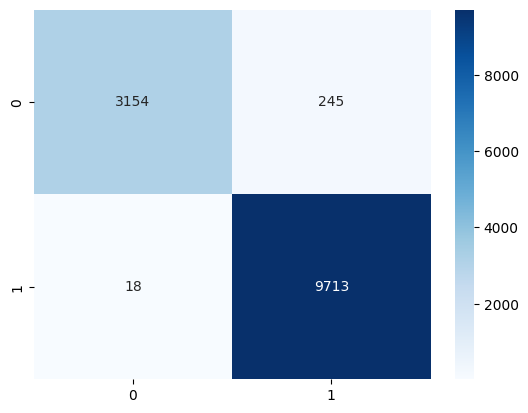

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


preds = model.predict(X_test)
cm = confusion_matrix(y_test, np.rint(preds))

print("Accuracy:",accuracy_score(y_test, np.rint(preds)))
print("Precision:", precision_score(y_test, np.rint(preds)))
print("Recall:", recall_score(y_test, np.rint(preds), average='macro'))
print("F1:", f1_score(y_test, np.rint(preds), average='macro'))


sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')